In [17]:
#!pip install SQLAlchemy
#!pip install nxviz
import nxviz
import networkx as nx
import numpy as np
import pandas as pd
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
from nxviz import ArcPlot
import matplotlib.pyplot as plt
%matplotlib inline  

ModuleNotFoundError: No module named 'nxviz'

In [4]:
#conn = sqlite3.connect('zhihu_1.0.db')
engine = create_engine('sqlite:///zhihu_1.0.db')
#c = conn.cursor()
df= pd.read_sql_table("follower_following_bitcoin", engine)
df.head()

follower      following
0  arthur-wang-9999    zengweihong
1           baskice      undefined
2           baskice  chen-yan-yu-2
3           baskice     aijunqiang
4           baskice    potacharles

In [ ]:
Gd = nx.DiGraph()
Gd.add_nodes_from(H)

E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
E:\Application\anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
E:\Application\anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

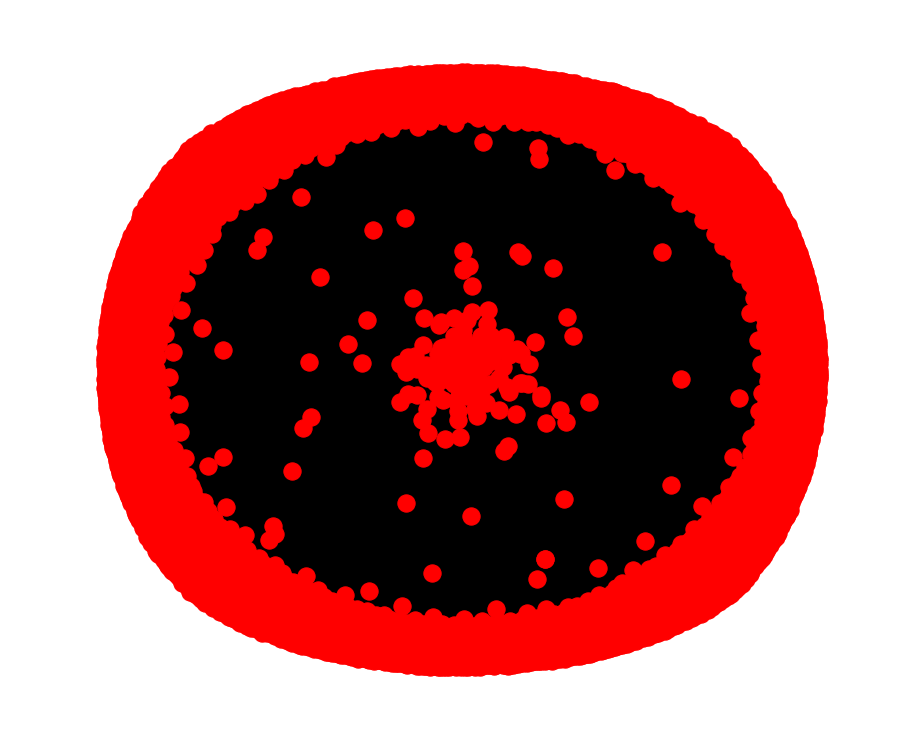

In [37]:
fig = plt.figure(figsize = (12,10))
G=nx.from_pandas_dataframe(df, source = "follower", target = "following", edge_attr=True,
                                   create_using=nx.DiGraph())
nx.draw(G)
plt.show()

In [36]:
type(G)

networkx.classes.graph.Graph

In [26]:
deg_cent = nx.degree_centrality(G)
max_dc = max(list(deg_cent.values()))
bigV = [n for n, dc in deg_cent.items() if dc == max_dc]
bigV

fif_V = sorted(list(deg_cent.items()), key=lambda x: x[1],reverse = True)[:15]
fif_V
#five_V = sorted(list(deg_cent.items()), key=lambda x: x[1],reverse = True)[:5]

[('zhouyuan', 0.17652337058487644),
 ('min-gan-de-fang-mei', 0.16494004404926993),
 ('sunlixia', 0.0866302308508035),
 ('de-yi-66', 0.062321559670446204),
 ('zhou-jun-35-80', 0.0568561872909699),
 ('jwu1990', 0.045354433477445145),
 ('zui-hou-de-chu-nan', 0.0429888245370748),
 ('general-perry', 0.038012888490088916),
 ('cai-cai-81-52', 0.03279223427685782),
 ('funnyhorse', 0.026918998286972837),
 ('weilaigeinimen', 0.02496125295701118),
 ('lei-lei-jia-jia', 0.02292193490496778),
 ('xing-he-9', 0.0225140712945591),
 ('chen-liu-37-29', 0.0213720531854148),
 ('williamnee', 0.020311607798352234)]

E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
E:\Application\anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
E:\Application\anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

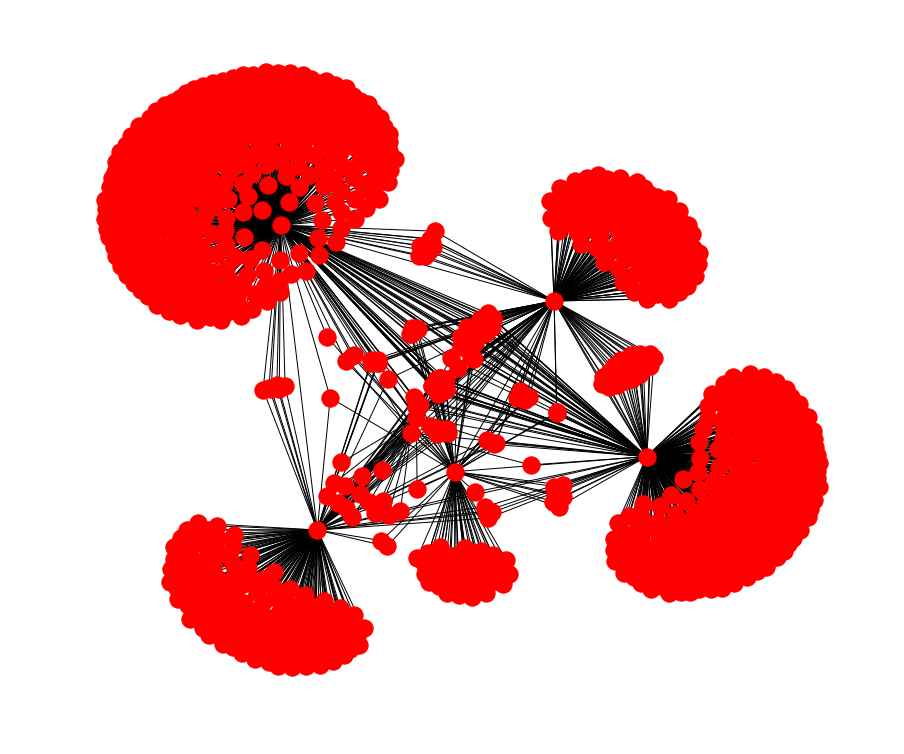

In [13]:
fig = plt.figure(figsize = (12,10))
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])
G_lmc = G.subgraph(largest_max_clique)
for node in G_lmc.nodes():
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(G.neighbors(node)), G.neighbors(node)))
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]
nx.draw(G_lmc)
plt.show()

In [26]:
nodes_of_interest = [i[0] for i in five_V]
nodes_of_interest

['zhouyuan', 'min-gan-de-fang-mei', 'sunlixia', 'de-yi-66', 'zhou-jun-35-80']

In [9]:
# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    
    # Iterate over the nodes of interest
    for n in nodes_of_interest:
    
        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):
        
            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
            
    return G.subgraph(nodes_to_draw)

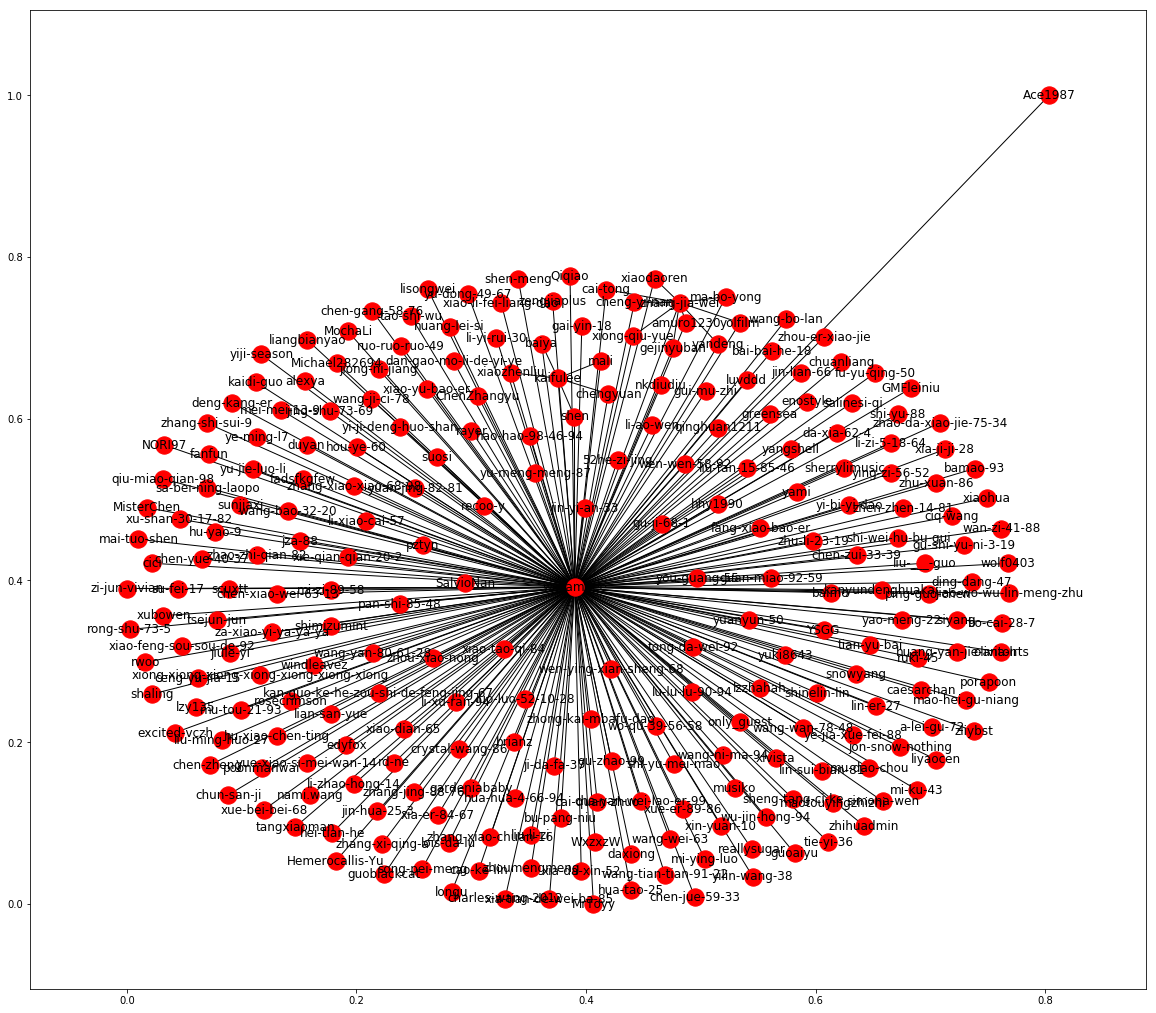

In [27]:
fig = plt.figure(figsize = (20,18))
# Extract the subgraph with the nodes of interest: T_draw
G_draw = get_nodes_and_nbrs(G,['williamnee'])

# Draw the subgraph to the screen
#nx.draw(G_draw)
nx.draw_networkx(G_draw)
plt.show()

E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
E:\Application\anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
E:\Application\anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

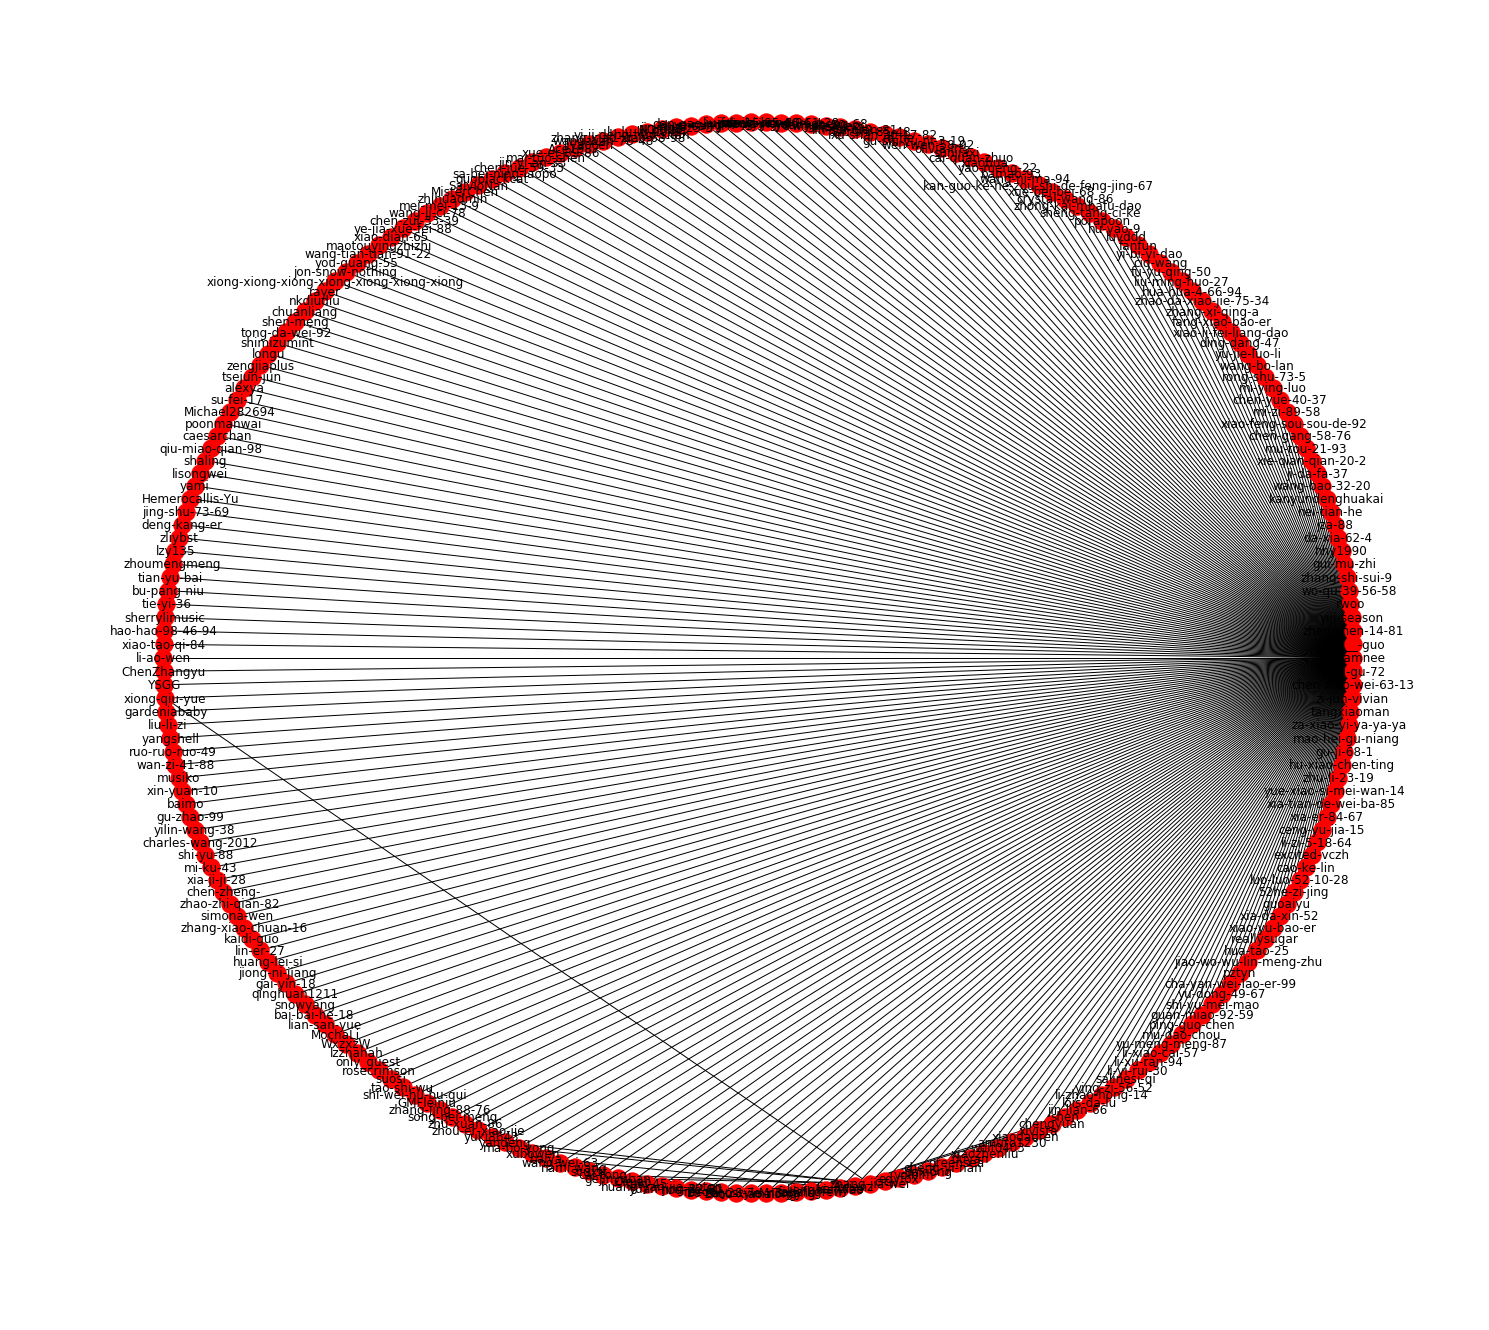

In [28]:
fig = plt.figure(figsize = (20,18))
nx.draw_circular(G_draw, with_labels =True)
plt.show()

E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
E:\Application\anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
E:\Application\anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

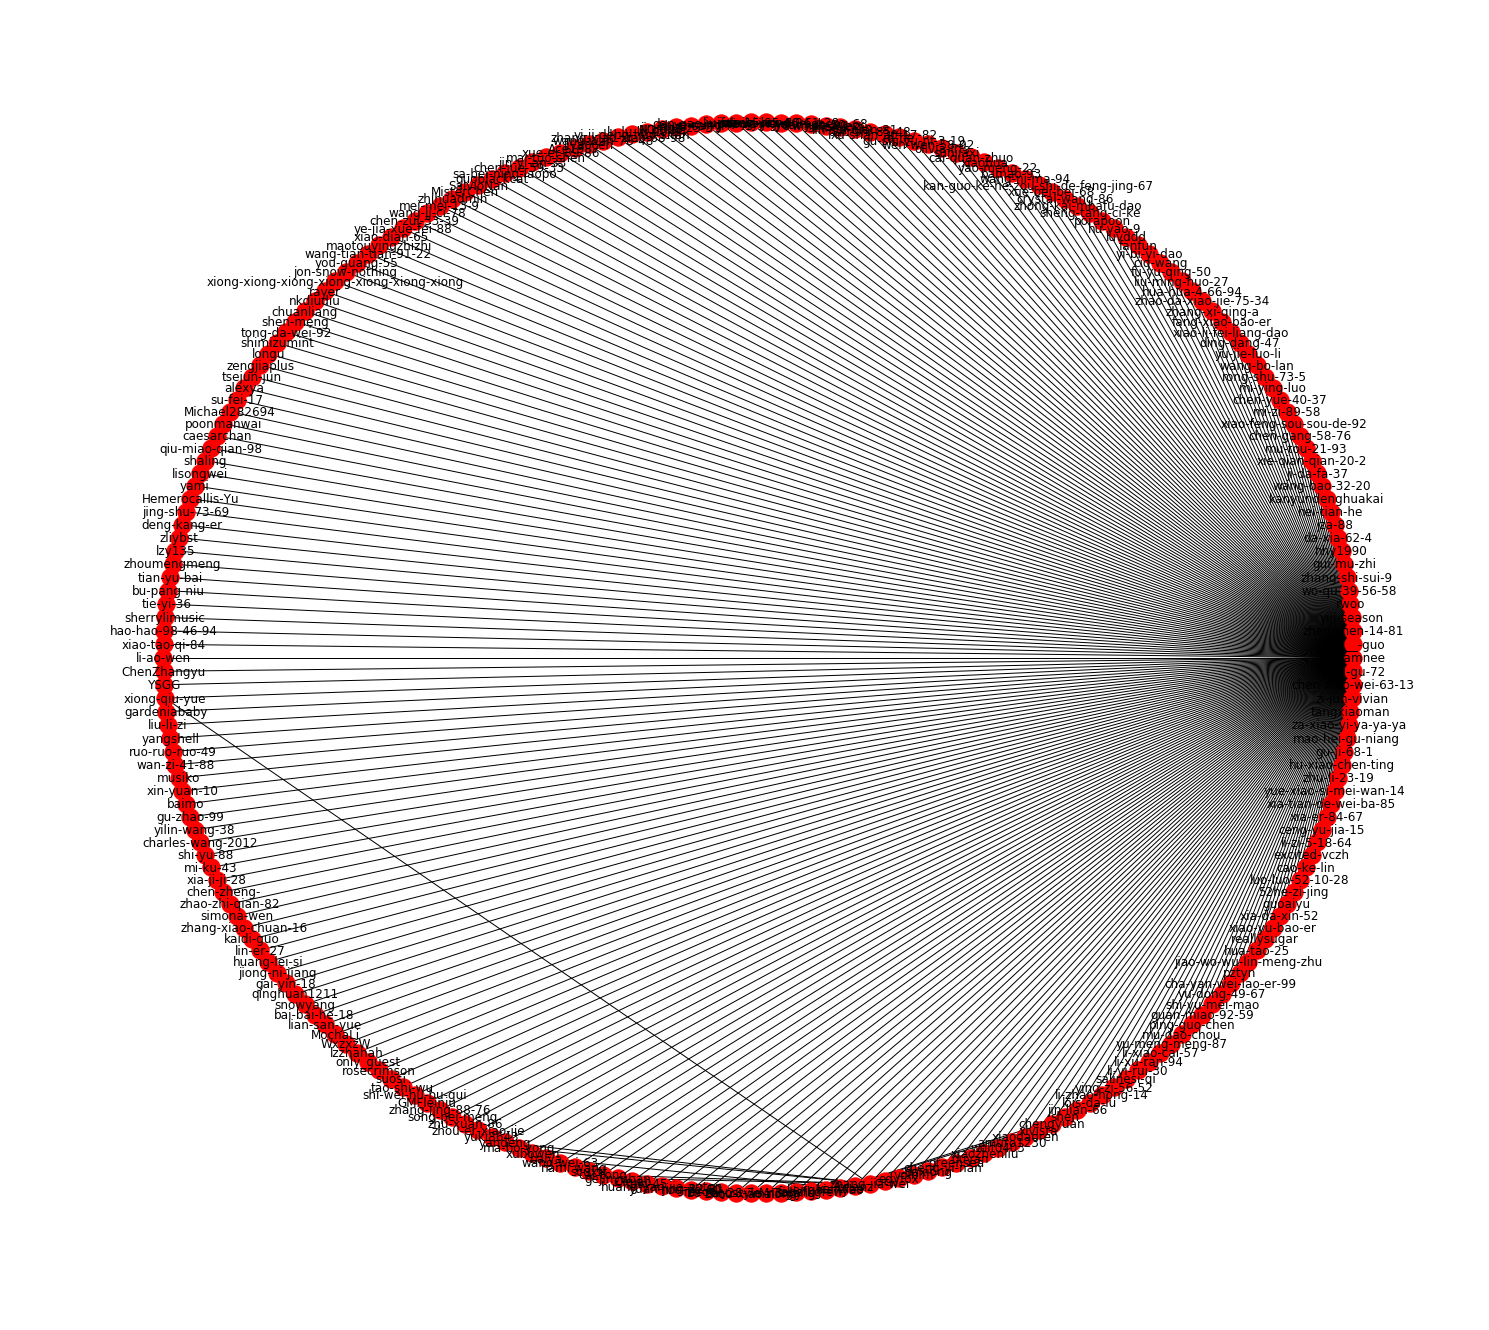

In [33]:
fig = plt.figure(figsize = (20,18))
nx.draw_shell(G_draw, with_labels =True)
plt.show()

E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
E:\Application\anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
E:\Application\anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

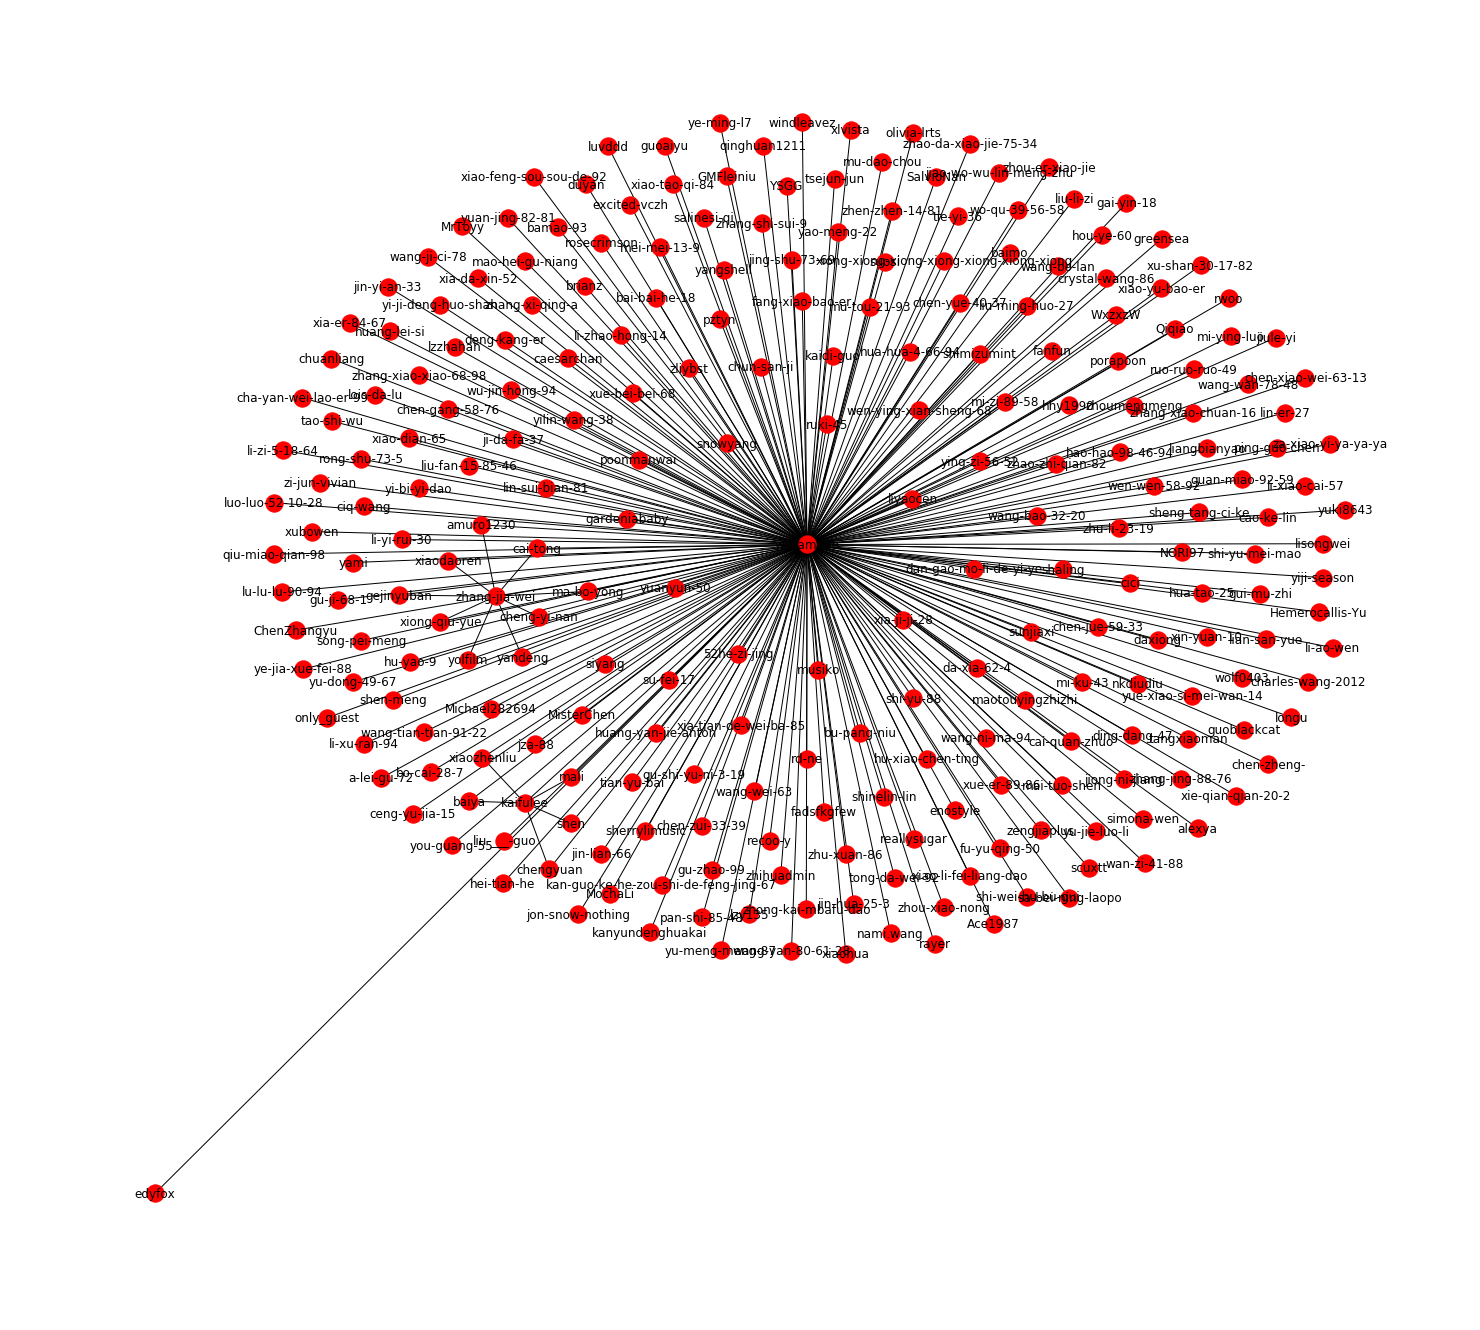

In [31]:
fig = plt.figure(figsize = (20,18))
nx.draw_spring(G_draw, with_labels =True)
plt.show()

E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
E:\Application\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
E:\Application\anaconda\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
E:\Application\anaconda\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

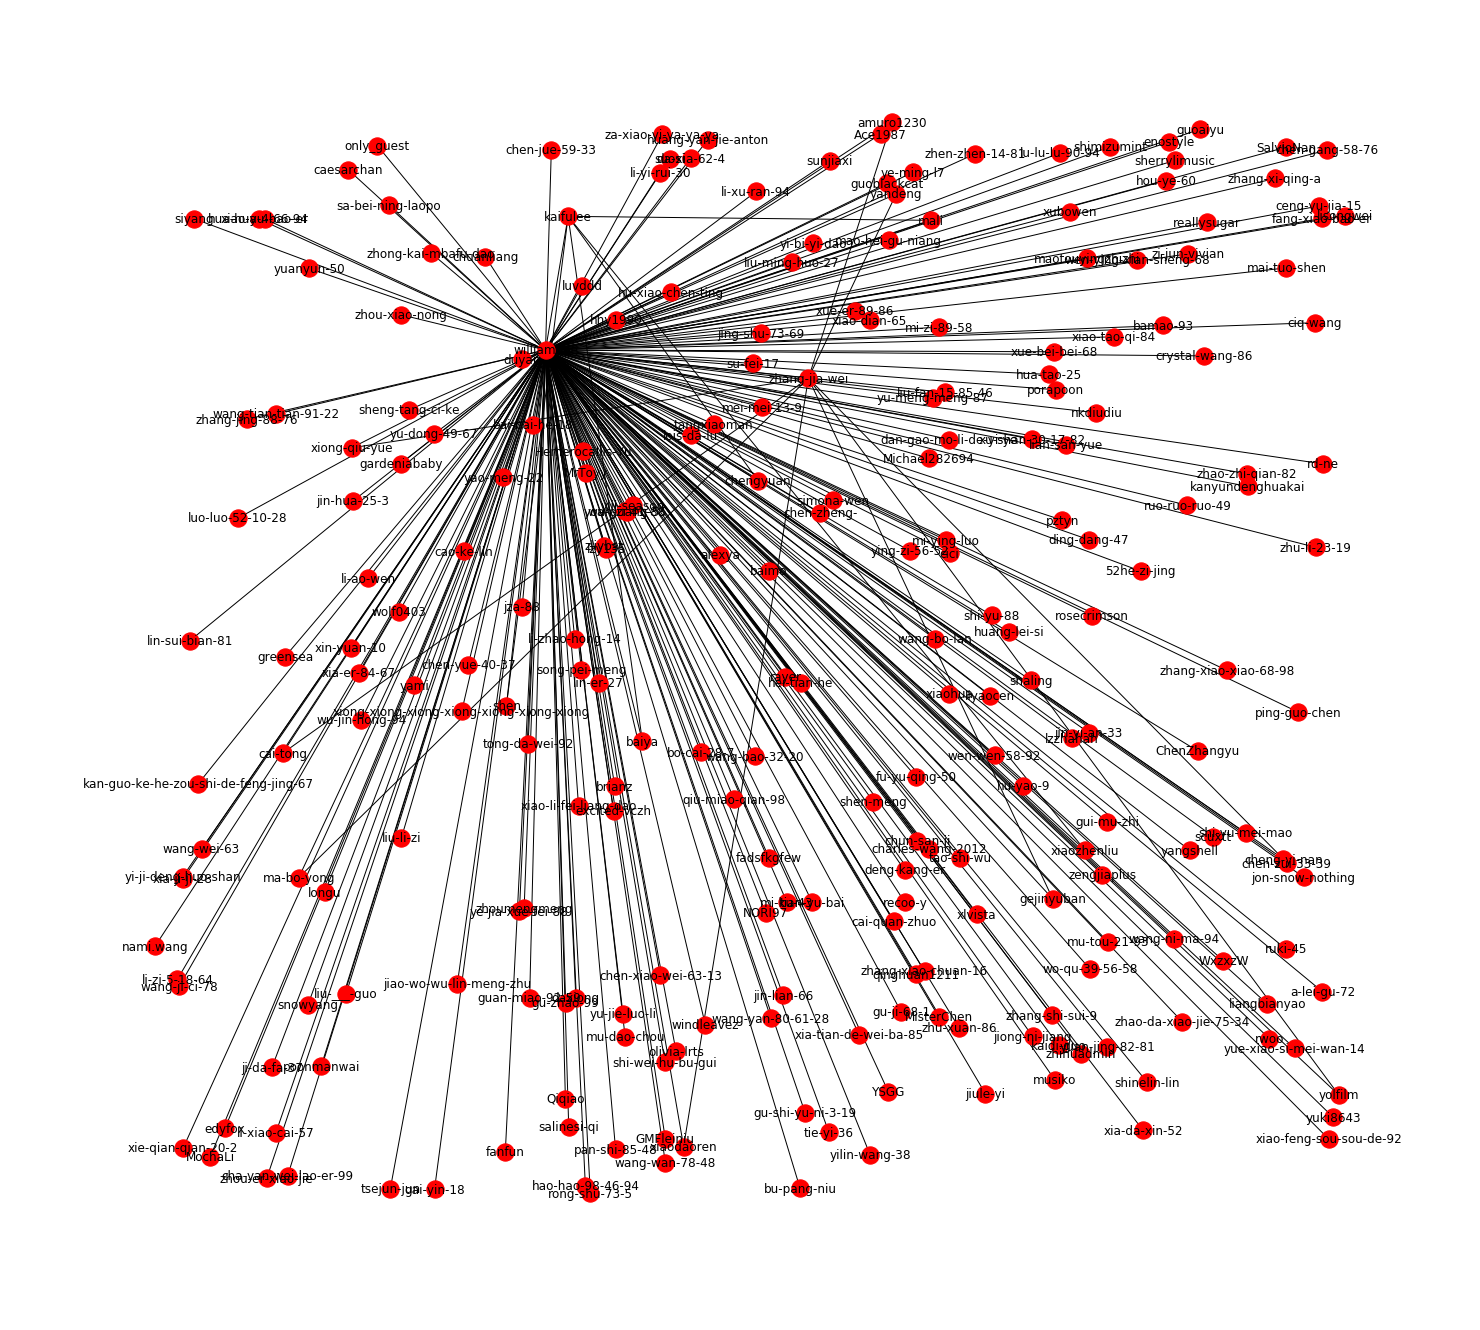

In [30]:
fig = plt.figure(figsize = (20,18))
nx.draw_random(G_draw, with_labels =True)
plt.show()